## Median of Two Sorted Arrays
#### Difficulty: Hard

Given two sorted arrays `nums1` and `nums2` of size `m` and `n` respectively, return the median of the two sorted arrays.

The overall run time complexity should be `O(log (m+n))`.

 

<strong>Example 1:</strong>

- Input: nums1 = [1,3], nums2 = [2]
- Output: 2.00000
- Explanation: merged array = [1,2,3] and median is 2.

<strong>Example 2:</strong>

- Input: nums1 = [1,2], nums2 = [3,4]
- Output: 2.50000
- Explanation: merged array = [1,2,3,4] and median is (2 + 3) / 2 = 2.5.
 

Constraints:

- `nums1.length` == `m`
- `nums2.length` == `n`
- 0 <= `m` <= 1000
- 0 <= `n` <= 1000
- 1 <= `m` + `n` <= 2000
- -10<sup>6</sup> <= `nums1[i]`, `nums2[i]` <= 10<sup>6</sup>

Link to problem: https://leetcode.com/problems/median-of-two-sorted-arrays/description/

In [ ]:
# Solution 1: Hard example of binary search.
# Logic of the binary search isn't terribly hard - trying to figure out the logic behind the partitions was the hard part
# after the Logic was found out, using binary search to implement was not terribly hard.
# Extra care put into edge cases
# Solution runs in optimal time.
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        A, B = nums1, nums2
        total = len(A) + len(B)
        half = total//2 # number of elements for left partition

        # Ensure A is the smaller array so our binary search space is minimal
        if len(B) < len(A):
            A, B = B, A
        
        l, r = 0, len(A) -1

        while True:
            # Partitions A into left/right parts
            i = (l + r) // 2
            # Partitions B so that both left parts together contain `half` # of elements
            j = half - i - 2
            
            # Handle edges by using -inf / +inf when the partition touches array bounds
            Aleft = A[i] if i >= 0 else float("-infinity")
            Aright = A[i + 1] if (i + 1) < len(A) else float("infinity")
            Bleft = B[j] if j >= 0 else float("-infinity")
            Bright = B[j + 1] if (j + 1) < len(B) else float("infinity")

            # Found partition (all elements in left half <= all in right half)
            if Aleft <= Bright and Bleft <= Aright:
                    # If total length is odd, median is the first element of the right half
                    if total % 2:
                        return min(Aright, Bright)
                    # If even, median is average of max(left) and min(right)
                    return (max(Aleft, Bleft) + min(Aright, Bright)) / 2
            
            # Partition not found - shift search window
            # A's left element is too big, move partition left
            elif Aleft > Bright:
                r = i - 1
            # B's left element is too big, move partition right (i too small)
            else:
                l = i + 1

Results:

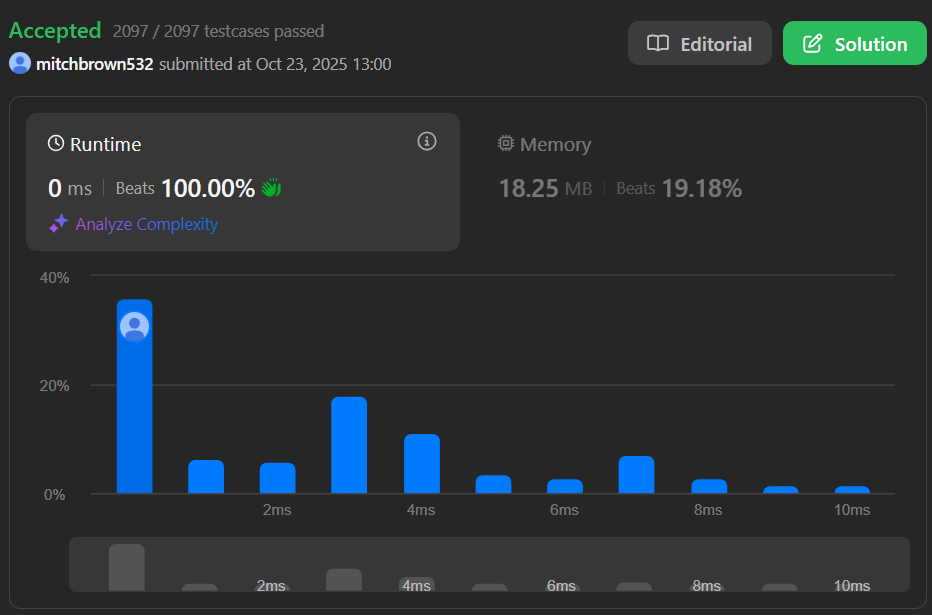